# Loading of the simulation results, analysis, and visualization

Written by Sungho Hong, Center for Cognition and Sociality, IBS, South Korea

September 26, 2025

In [22]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from dataanalysis_mlinet.plot import SpikePlot, MultiTrace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Create first plot - multiple trials

data_dir = '../../data/processed/simulation_results'
net_sim_output_dir = f'{data_dir}/output_network_simulation'
pc_sim_output_dir = f'{data_dir}/output_pc_simulation'

assert os.path.exists(net_sim_output_dir)
assert os.path.exists(pc_sim_output_dir)

network_id = '43_20241112_153832'
params = {
    'axes.labelsize':  6,
    'axes.titlesize':  6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6
}

rcParams.update(params)

## CF sync = 0

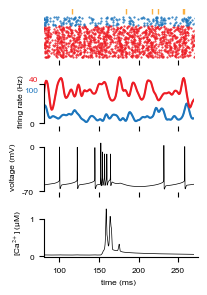

In [ ]:
def plot_sync_data(sync, trial, network_id, net_sim_output_dir, pc_sim_output_dir):
    fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(1.77*1.2, 2.5 * 1.2))

    p1 = SpikePlot(
        filenames=[
            f"{net_sim_output_dir}/spk_{network_id}_cfsync_sync_{sync}_w2_70_trial_{trial}.csv"
        ],
        fig_ax=(fig, axs[:2]),
    )

    p1.raster_plot(trial=trial, show_xaxis=False)
    p1.grouped_rate_plot(xscalebar=False)


    f1 = np.load(
        f"{pc_sim_output_dir}/pc_cf2_cf_29_pf_12_sync_{sync}_trial_{trial}_somav.npz"
    )

    mtv = MultiTrace("voltage", fig_ax=(fig, axs[2]))
    mtv.add_trace(f1, None, "k", f"sync {sync}")
    mtv.plot_traces(with_xscale_bar=False, with_yscale_bar=True, with_xaxis=False)

    f3 = np.load(
        f"{pc_sim_output_dir}/pc_cf2_cf_29_pf_12_sync_{sync}_trial_{trial}_ca.npz"
    )

    dfx = pd.DataFrame(f3["segs"], columns=["seg", "x", "diam", "dist"])
    dfx["diam"] = dfx["diam"].astype(float)
    dfx["dist"] = dfx["dist"].astype(float)
    dendA = dfx[dfx["seg"].str.contains("dendA")]

    # Plot histogram of diameters
    spiny = ((dfx.dist > 0) & (dfx.diam < 1.5) & dfx["seg"].str.contains("dendA")).values
    spiny = np.array(spiny)

    mtca = MultiTrace("calcium", fig_ax=(fig, axs[3]))
    mtca.add_trace(f3, spiny, "k", f"sync {sync}")
    _, data = mtca.plot_traces(
        with_xscale_bar=False, with_yscale_bar=False, with_xaxis=True, return_data=True
    )

    axs[1].set_ylabel('firing rate (Hz)')
    axs[2].set_ylabel('voltage (mV)')
    axs[3].set_ylabel('[Ca$^{2+}$] (μM)')
    axs[3].set_xlabel('time (ms)')

    plt.tight_layout()
    plt.savefig(f"all_plot_{network_id}_sync_{sync}.pdf")

    return fig, axs


fig, axs = plot_sync_data(sync=0, trial=11, network_id='43_20241112_153832', net_sim_output_dir=net_sim_output_dir, pc_sim_output_dir=pc_sim_output_dir)

## CF sync = 8

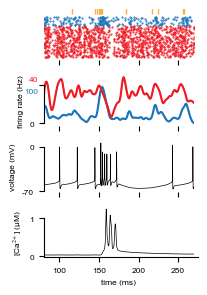

In [26]:
fig, axs = plot_sync_data(sync=8, trial=11, network_id='43_20241112_153832', net_sim_output_dir=net_sim_output_dir, pc_sim_output_dir=pc_sim_output_dir)